# Project: TMDb(The Movie Database) Data Analysis 

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Exploratory Data Analysis](#eda)
  - [Research Question 1](#rq1)
  - [Research Question 2](#rq2)
- [Conclusions](#conclusions)
- [Bibliography](#bib)

<a id='intro'></a>
## Introduction

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including IMDB id,	popularity,	budget,	original title,	cast, homepage,	director, tagline, keywords, overview, runtime,	genres,	production companies, release date, vote count, vote average, release year, budget adjacent and revenue adjacent for inflation accounting in 2010 dollars, user ratings and revenue.

**Questions**:
1. What kind of properties is present in high grossing films?
2. Which year which genre was popular?

In [1]:
# import all necessary packages and functions
# for creating dataframe and series for the read csv data
import pandas as pd

# for calculating mean, stddev, min, max for series
import numpy as np

# Import counter to count the frequency of words in a list  
from collections import Counter

# for plotting graphs
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Loading in the TMDb huge database of movies into my panda dataframe and previewing first few rows of it.

In [2]:
# load data into 'tmdb_data' and set 'id' as the index column in datafame returned
tmdb_data = pd.read_csv("tmdb_movies.csv", index_col='id')

# Print few lines of the dataframe
tmdb_data.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's see how many rows are there in this huge database.

In [3]:
# Checking the total number of rows in the TMDb database
len(tmdb_data)

10866

This huge database contains 10865 rows in total.

- After some exploration of the data there are some columns with missing values as they are either documentaries, animations or left blank as they are filled by users :
    1. **imdb_id**: Probably because many films are not added by the filmmakers
    2. **cast**: Some movies don't have a cast at all as they are either Documentaries, animation films
    3. **homepage**
    4. **director**: As they are documentaries
    5. **tagline**: Some movies don't have a tagline
    6. **keywords**
    7. **genres**
    8. **prod_companies** Some movies don't have production companies involved


- Certain columns, like **‘cast’ and ‘genres’**, contain multiple values **separated by pipe (|) characters.**


- There are **some odd characters in the ‘cast’ column.**


- The **final two columns ending with “_adj”** show the budget and revenue of the associated movie in terms of 2010 dollars, **accounting for inflation over time**.


- There are some columns having **weird main title** names like "Ã¥Â¤ÂªÃ¦Å¾Ã¥Â¼Â Ã¤Â¸â€°Ã¤Â¸Â°" as they are Chinese titles as inferred from the corresponding Chinese cast.


- There is also **one duplicate row** which needs to be cleaned.

### Data Cleaning
#### Total number of rows in data

In [4]:
# print total number of rows of movies data
len(tmdb_data)

10866

There are total 10866 rows in the database.** Roger that.**
#### Checking duplicacy in  tmdb database

In [5]:
# Checking duplicate row in tmdb database and keeping the first duplicate in tmdb_duplicate_rows object
tmdb_duplicate_rows = tmdb_data[tmdb_data.index.duplicated(keep='first')]

# print duplicate row
tmdb_duplicate_rows

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


So, there is **one duplicate** row in TMDb data having **id = 42194** related to the movie **Tekken**. Copy.

#### Removing duplicate row from tmdb dataframe

In [6]:
# Remove duplicate row by keeping first duplicate in the dataframe inplace
tmdb_data.drop_duplicates(subset=tmdb_data, keep='first', inplace=True)

#### Total number of rows after removing duplicate

In [7]:
# print total number of rows in the TMDb data
len(tmdb_data)

10865

After removing the duplicate row from our database we have **10865** which is not surprising.

<a id='eda'></a>
## Exploratory Data Analysis
<a id='rq1'></a>
### Research Question 1: What kind of properties are present in high grossing films?

The [Kaggle TMDB page](https://www.kaggle.com/tmdb/tmdb-movie-metadata) says that: 

> This dataset hasn't yet gone through a data quality analysis. Can you find any obvious corrections? For example, in the IMDb version, it was necessary to **treat values of zero in the budget field as missing**. Similar findings would be very helpful to your fellow Kagglers! (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).

So, the **budget fields having value zero** values should be treated as missing and shouldn't be included in our analysis. So, 

**Separating rows with zero budget**

In [8]:
# Create new dataframe with rows having the non-zero budget
tmdb_data_non_zero_budget = tmdb_data[tmdb_data.budget != 0]

# Total rows after seperating zero budget rows
len(tmdb_data_non_zero_budget)

5169

A total number of rows after separating films with zero budget there are **5169 total rows.**

**Separating high and low grossing films**

**Assumption :** 
- Films are considered High grossing if their revenue is greater than or equal to 1 million and Low grossing to those whose revenue is less than 1 million.

The [Kaggle TMDB page](https://www.kaggle.com/tmdb/tmdb-movie-metadata) says that: 

>There are some things we haven't had a chance to confirm about the new dataset. If you have any insights, please let us know in the forums!
>   - Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?

So, the statistics and graphs drawn **may not be accurate.**

In [9]:
# Filtering films with revenue >= 1 million from non-zero budget films to create high grossing film data
high_grossing_films = tmdb_data_non_zero_budget[tmdb_data_non_zero_budget.revenue >= 1000000]
                                                
# Total rows after filtering
len(high_grossing_films)

3601

Total rows in **high grossing films are 3601.**

In [10]:
# Filtering films with revenue < 1 million from non-zero budget films to create low grossing film data
low_grossing_films = tmdb_data_non_zero_budget[tmdb_data_non_zero_budget.revenue < 1000000]

# Total rows after filtering
len(low_grossing_films)

1568

Total rows in **low grossing films are 1568** and summing up 3601 and 1568 equals to **5169** which is equal to the initial total number of films after separating it from zero budget films which suggest we are going right. Now, **comparing high and low grossing films.**

**Statistical Analysis**

In [11]:
def describe_data(data):
    """
    Takes input a pandas series and prints Mean, Standard deviation, 
    Minimum, and Maximum of the input pandas series.
    """
    # Print the mean of pandas series
    print("Mean: {}".format(data.mean()))
    # Print the standard deviation of pandas series
    print("Standard deviation: {}".format(data.std()))
    # Print the minimum of pandas series
    print("Minimum: {}".format(data.min()))
    # Print the maximum of pandas series
    print("Maximum: {}".format(data.max()))

def degree_of_coorelation(data_x, data_y):
    """
    This function takes in two series and calculates the coorelation
    between them and returns it
    """
    # Return the coorelation calculated between data_x and data_y by accessing index 0, 1
    return np.corrcoef(data_x, data_y)[0, 1]

print("****HIGH GROSSING FILMS POPULARITY****: ")
describe_data(high_grossing_films.popularity)
print("CORRELATION BETWEEN POPULARITY AND REVENUE: {}".format(degree_of_coorelation(high_grossing_films.revenue,
                                                                                    high_grossing_films.popularity)))

print("\n****LOW GROSSING FILMS POPULARITY****: ")
describe_data(low_grossing_films.popularity)
print ("CORRELATION BETWEEN POPULARITY AND REVENUE: {}".format(degree_of_coorelation(low_grossing_films.revenue,
                                                                                     low_grossing_films.popularity)))

print ("\n****HIGH GROSSING FILMS BUDGET****: ")
describe_data(high_grossing_films.budget)
print ("CORRELATION BETWEEN BUDGET AND REVENUE: {}".format(degree_of_coorelation(high_grossing_films.revenue,
                                                                                 high_grossing_films.budget)))

print("\n****LOW GROSSING FILMS BUDGET****: ")
describe_data(low_grossing_films.budget)
print ("CORRELATION BETWEEN BUDGET AND REVENUE: {}".format(degree_of_coorelation(low_grossing_films.revenue,
                                                                                 low_grossing_films.budget)))

print("\n****HIGH GROSSING FILMS VOTE COUNT****: ")
describe_data(high_grossing_films.vote_count)
print ("CORRELATION BETWEEN VOTE COUNT AND REVENUE: {}".format(degree_of_coorelation(high_grossing_films.revenue,
                                                                                     high_grossing_films.vote_count)))

print("\n****LOW GROSSING FILMS VOTE COUNT****: ")
describe_data(low_grossing_films.vote_count)
print ("CORRELATION BETWEEN VOTE COUNT AND REVENUE: {}".format(degree_of_coorelation(low_grossing_films.revenue, 
                                                                                     low_grossing_films.vote_count)))

print("\n****HIGH GROSSING FILMS VOTE AVERAGE****: ")
describe_data(high_grossing_films.vote_average)
print ("CORRELATION BETWEEN VOTE AVERAGE AND REVENUE: {}".format(degree_of_coorelation(high_grossing_films.revenue,
                                                                                       high_grossing_films.vote_average)))

print("\n****LOW GROSSING FILMS VOTE AVERAGE****: ")
describe_data(low_grossing_films.vote_average)
print ("CORRELATION BETWEEN VOTE AVERAGE AND REVENUE: {}".format(degree_of_coorelation(low_grossing_films.revenue,
                                                                                       low_grossing_films.vote_average)))

****HIGH GROSSING FILMS POPULARITY****: 
Mean: 1.2441147295195767
Standard deviation: 1.5104529518771455
Minimum: 0.001117
Maximum: 32.985763
CORRELATION BETWEEN POPULARITY AND REVENUE: 0.6079706161967124

****LOW GROSSING FILMS POPULARITY****: 
Mean: 0.41432275829081516
Standard deviation: 0.32557839319225407
Minimum: 0.001349
Maximum: 3.2809480000000004
CORRELATION BETWEEN POPULARITY AND REVENUE: 0.02367598129142163

****HIGH GROSSING FILMS BUDGET****: 
Mean: 39278826.801444046
Standard deviation: 42805178.43541374
Minimum: 93
Maximum: 425000000
CORRELATION BETWEEN BUDGET AND REVENUE: 0.6807983327043919

****LOW GROSSING FILMS BUDGET****: 
Mean: 11128707.128188776
Standard deviation: 15161593.349276781
Minimum: 1
Maximum: 150000000
CORRELATION BETWEEN BUDGET AND REVENUE: -0.059191586763079694

****HIGH GROSSING FILMS VOTE COUNT****: 
Mean: 559.4707025826159
Standard deviation: 901.4628252579121
Minimum: 10
Maximum: 9767
CORRELATION BETWEEN VOTE COUNT AND REVENUE: 0.7496483069768237



**Conclusions: **The correlation for each variable compared for high grossing films is greater than low grossing films.

**Visualizations**

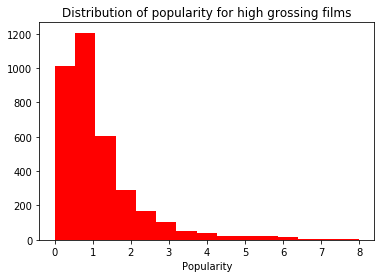

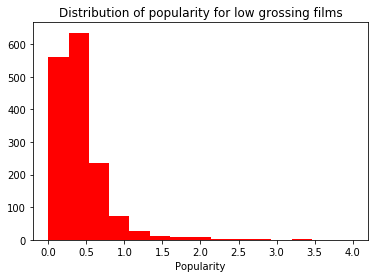

In [12]:
def plot_vertical_hist(data, bins, xlabel, title, _range, bar_color):
    """
    This function takes in the data to be plotted, bin size, 
    xlabel to name the x label with the string given, title to display 
    the graph title and _range to get the range and get rid of outliers 
    in the histogram
    """
    # To plot graphs inline in this notebook
    %matplotlib inline
    
    # Plot a histogram with the data supplied, bin size equal to bins and range equal to _range
    plt.hist(data, bins=bins,range=_range, color=bar_color)
    
    # Name the xlabel in the histogram with the string xlabel
    plt.xlabel(xlabel)
    
    # Name the title in the histogram with the string title
    plt.title(title)
    
    # Show the histogram
    plt.show()

# Plot the histogram for popularity of high grossing films with bin size equal to 15 and with
# x label, title and range from 0 to 8 and bar color = red
plot_vertical_hist(high_grossing_films.popularity, bins=15, xlabel='Popularity',
          title='Distribution of popularity for high grossing films', _range=(0, 8), bar_color='r')   

# Plot the histogram for popularity of low grossing films with bin size equal to 15 and with
# x label, title and range from 0 to 4 and bar color = red
plot_vertical_hist(low_grossing_films.popularity, bins=15, xlabel='Popularity',
          title='Distribution of popularity for low grossing films', _range=(0, 4), bar_color='r')

For popularity graph for the high grossing film is **less positively skewed** than low grossing films which is what I expected.

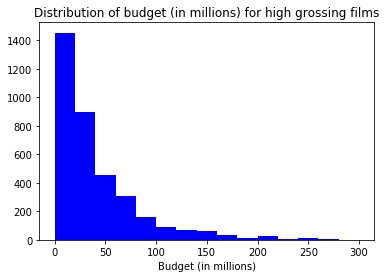

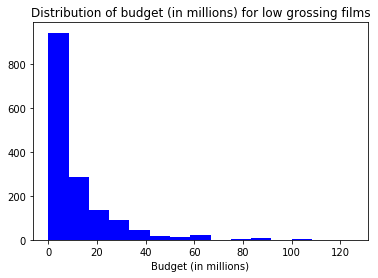

In [13]:
# Plot the histogram for budget of high grossing films (in millions by dividing each value by 
# a million) with bin size equal to 15 and with x label, title and range from 0 to 300 million
# and bar color = blue
plot_vertical_hist(high_grossing_films.budget/1000000, bins=15, xlabel='Budget (in millions)',
          title='Distribution of budget (in millions) for high grossing films', _range = (0,300),  bar_color='b')

# Plot the histogram for budget of low grossing films (in millions by dividing each value by 
# a million) with bin size equal to 15 and with x label, title and range from 0 to 125 million
# and bar color = blue
plot_vertical_hist(low_grossing_films.budget/1000000, bins=15, xlabel='Budget (in millions)',
          title='Distribution of budget (in millions) for low grossing films', _range=(0, 125),  bar_color='b')

Again, the budget graph of the high grossing film is **less positively skewed** than low grossing films which are again what I expected.

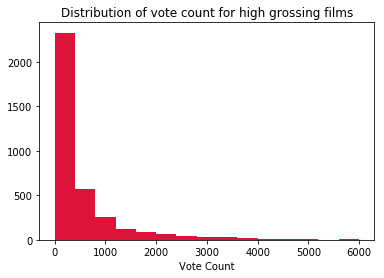

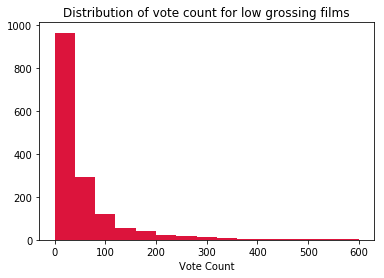

In [14]:
# Plot the histogram for vote count of high grossing films with bin size equal to 15 and with
# x label, title and range from 0 to 6000 and bar color = crimson
plot_vertical_hist(high_grossing_films.vote_count, bins=15, xlabel='Vote Count',
          title='Distribution of vote count for high grossing films', _range=(0, 6000),  bar_color='crimson')

# Plot the histogram for vote count of low grossing films with bin size equal to 15 and with
# x label, title and range from 0 to 600 and bar color = crimson
plot_vertical_hist(low_grossing_films.vote_count, bins=15, xlabel='Vote Count',
          title='Distribution of vote count for low grossing films', _range=(0, 600),  bar_color='crimson')

Hmm... Again, Vote Count graph of the high grossing film is looking similar to low grossing films but the x-axis values suggest that **vote count for the high grossing film is high than low grossing films.**

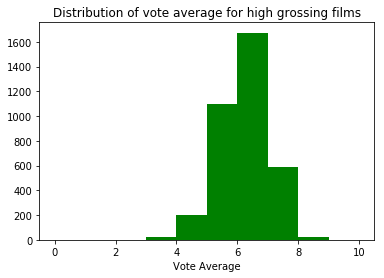

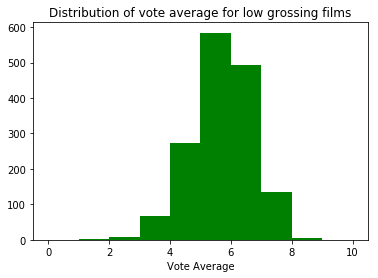

In [15]:
# Plot the histogram for vote average of high grossing films with bin size equal to 15 and with
# x label, title and range from 0 to 10 and bar color = green
plot_vertical_hist(high_grossing_films.vote_average, bins=10, xlabel='Vote Average',
          title='Distribution of vote average for high grossing films', _range=(0, 10),  bar_color='g')

# Plot the histogram for vote average of low grossing films with bin size equal to 15 and with
# x label, title and range from 0 to 10 and bar color = green
plot_vertical_hist(low_grossing_films.vote_average, bins=10, xlabel='Vote Average',
          title='Distribution of vote average for low grossing films', _range=(0, 10),  bar_color='g')

Again, for vote average graph for the high grossing film has **more votes** lying in 6 to 8 range whereas for low grossing films vote average lies between 4 to 6.

**Comparision of genres frequency in high and low grossing films**

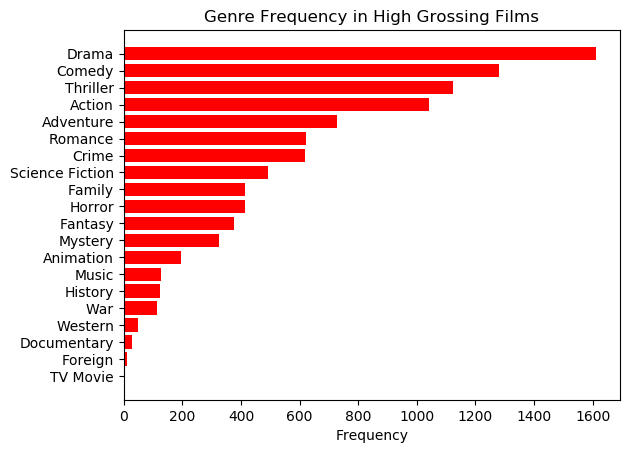

In [16]:
def plot_horizantal_bar(data, ylabels, title, xlabel, color):
    """
    This function takes in data to plot, labels to show on
    y-axis, title to display as title, xlabel and color of 
    bars to show to plot a horizontal bar plot
    """
    # To plot graphs inline in this notebook
    %matplotlib inline
    
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults()
    
    # assigning fig and ax objects returned by plt.subplots
    fig, ax = plt.subplots()

    # count till length of data
    y_pos = np.arange(len(data))
    
    # Plot the horizontal bar graph with data supplied and color 
    ax.barh(y_pos, data, align='center', color=color)
    
    # Set the ytick positions
    ax.set_yticks(y_pos)
    
    # Set the ytick texts
    ax.set_yticklabels(ylabels)
    
    # Show highest to lowest count
    ax.invert_yaxis()
    
    # Set the x label as xlabel
    ax.set_xlabel(xlabel)
    
    # Set the plot title
    ax.set_title(title)

    # Plot the graph
    plt.show()

def words_counter_in_series(pd_series, delimiter):
    """
    This function takes in a panda series and string delimiter and 
    returns a sorted descending order counter of all strings in panda series
    by splitting it with delimiter
    """
    # split each string in pd_series(panda series) and stack them and count the values
    # and return them in descending order
    return pd_series.str.split(delimiter, expand=True).stack().value_counts()

# get the genres frequency for high grossing films by passing the genres column
# and string delimiter equal to '|' in function words_counter_in_series
high_grossing_genres_frequency = words_counter_in_series(high_grossing_films.genres, '|')

# Plot the genres frequency for high grossing films
plot_horizantal_bar(high_grossing_genres_frequency.values, high_grossing_genres_frequency.index, 
                    "Genre Frequency in High Grossing Films", "Frequency", color='r')

**Conclusions: **
The Genre frequency table suggests that **high grossing films** are more **on Drama, Comedy, Thriller, Action, Adventure, Romance, Crime, Science Fiction, etc** which were quietly expected.

Let's see how about **Low grossing films: **

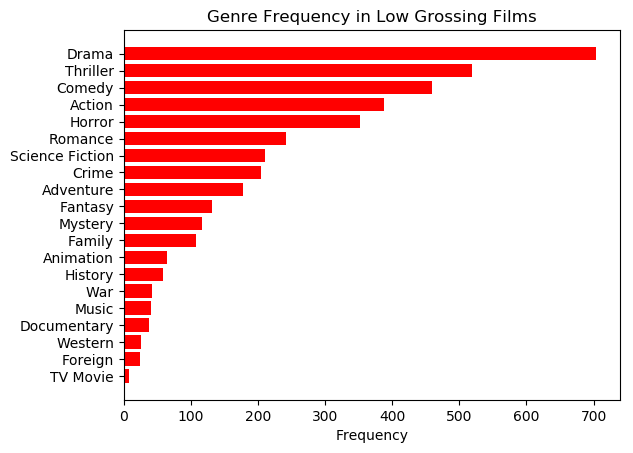

In [17]:
# get the genres frequency for low grossing films by passing the genres column
# and string delimiter equal to '|' in function words_counter_in_series
low_grossing_genres_frequency = words_counter_in_series(low_grossing_films.genres, '|')

# Plot the genres frequency for low grossing films
plot_horizantal_bar(low_grossing_genres_frequency.values, low_grossing_genres_frequency.index, 
                    "Genre Frequency in Low Grossing Films", "Frequency", color='r')

**Conclusions: **
The Genre frequency table suggests that low grossing films are more **on Drama, Thriller, Comedy, Action, Horror, Romance, Science Fiction, etc** which is surprisingly same to high grossing films which weren't quite expected.

I think same analysis should be done but this time I would take keywords column and compare the keywords frequency for both high and low grossing films.

**Comparision of kewords frequency in high and low grossing films**

C:\Users\RUPANSHU\Anaconda3\lib\site-packages\pandas\core\strings.py:1036: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


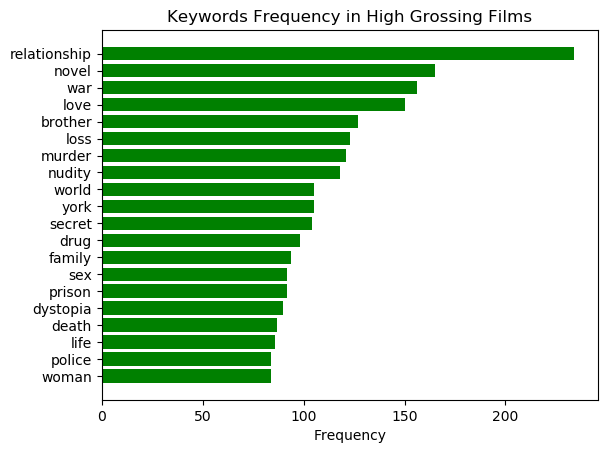

In [18]:
def exclude_ordinary_words(series):
    """
    This function takes in a series with count of each word and excludes
    the word which is ordinary like 'is', 'are', etc. and the new series
    with ordinary words exluded are returned
    """
    # excluding ordinary words collected in series and ignoring any errors
    # by setting flag errors='ignore' in drop method.
    # Ordinary words taken from https://www.ef.com/english-resources/english-vocabulary/top-100-words/ and some added as needed
    indexes_without_ordinary_words = series.index.drop(['a', 'about', 'all', 'also', 'and', 'as', 'at', 'be', 'because', 'but', 'by', 'can', 'come', \
                              'could', 'day', 'do', 'even', 'find', 'first', 'for', 'from', 'get', 'give', 'go', 'have', 'he',\
                              'her', 'here', 'him', 'his', 'how', 'I', 'if', 'in', 'into', 'it', 'its', 'just', 'know', 'like',\
                              'look', 'make', 'man', 'many', 'me', 'more', 'my', 'new', 'no', 'not', 'now', 'of', 'on', 'one',\
                              'only', 'or', 'other', 'our', 'out', 'people', 'say', 'see', 'she', 'so', 'some', 'take', 'tell',\
                              'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'thing', 'think', 'this',\
                              'those', 'time', 'to', 'two', 'up', 'use', 'very', 'want', 'way', 'we', 'well', 'what', 'when', \
                              'which', 'who', 'will', 'with', 'would', 'year', 'you', 'your', 'independent', 'based', 'film',\
                                'director', 'duringcreditsstinger', 'found', 'high'], errors='ignore')
    # Return the new series without ordinary words to the caller
    return pd.Series(series, index=indexes_without_ordinary_words)

# Get the keywords frequency for high grossing films by passing the keywords column
# and string delimiter equal to sequence of '|' and space as a regular expression in
# function words_counter_in_series
high_grossing_keywords_frequency = words_counter_in_series(high_grossing_films.keywords, '[|]*[ ]*')

# Exclude ordinary words from the counter returned by words_counter_in_series method and 
# assign back to high_grossing_keywords_frequency
high_grossing_keywords_frequency = exclude_ordinary_words(high_grossing_keywords_frequency)

# Plot the top 20 keywords counter for high grossing films
plot_horizantal_bar(high_grossing_keywords_frequency.values[:20], high_grossing_keywords_frequency.index[:20], 
                    "Keywords Frequency in High Grossing Films", "Frequency", 'g')

**Conclusions: **
The Keywords frequency table suggests that **high grossing films** are more based **on Relationships, Novels, War and Love, etc.**
Can't say anything more about this but let's see what **low grossing films** have in them when it comes to keywords in them.

C:\Users\RUPANSHU\Anaconda3\lib\site-packages\pandas\core\strings.py:1036: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


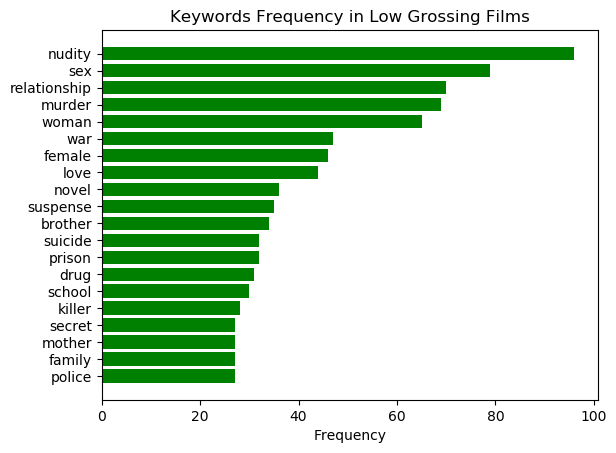

In [19]:
# Get the keywords frequency for low grossing films by passing the keywords column
# and string delimiter equal to sequence of '|' and 'space' as a regular expression in
# function words_counter_in_series
low_grossing_keywords_frequency = words_counter_in_series(low_grossing_films.keywords, '[|]*[ ]*')

# Exclude ordinary words from the counter returned by words_counter_in_series and 
# assign back to low_grossing_keywords_frequency
low_grossing_keywords_frequency = exclude_ordinary_words(low_grossing_keywords_frequency)

# Plot the top 20 keywords counter for low grossing films
plot_horizantal_bar(low_grossing_keywords_frequency.values[:20], low_grossing_keywords_frequency.index[:20], 
                    "Keywords Frequency in Low Grossing Films", "Frequency", 'g')

**Conclusions: **Hmmm. It was quite expected that **low grossing films will be more explicit** and it was.

<a id='rq2'></a>
### Research Question 2: Which year which genre was popular?

Now, let's print the popular genre for each year by splitting all genres related to a particular year and count the frequency of each genre and print the genre with the highest frequency for a particular year.

**Grouping films according to their release year**

In [20]:
# Group films by release year
tmdb_groupby_year = tmdb_data.groupby(tmdb_data.release_year)

**Previewing the group related to release year 1961**

In [21]:
# Preview group related to release year of 1961  
tmdb_groupby_year.groups[1961]

Int64Index([12230,   164,  1725, 10911,   750,   821, 19186, 30462, 16638,
            16372,   990, 36362, 11536, 17984, 28501, 18993, 28569, 28752,
            20139, 32611, 18647,   430, 20975, 24248,   248, 18228, 43020,
            28430, 28333, 32634, 29478],
           dtype='int64', name='id')

**Observation**: All films are grouped *by their respective index* in grouping

In [22]:
def get_popular_genres_for_year(movies_indexes):
    """
    This function takes in movie_indexes of a particular year and returns
    the genre with the highest count at that particular year
    """
    # Set up an empty splitted_genres list
    splitted_genres = list()
    
    # For each movie in that year collect the genre string, split it 
    # and add it to the splitted_genres list 
    for index in movies_indexes:
        # Collect the genre string in genres
        genres = str(tmdb_data.loc[index].genres)
        
        # If the genre string collected is empty skip it
        if genres == '':
            continue
        
        # Split the genre string by delimiter '|' and add it to the 
        # splitted genres list 
        splitted_genres.extend(genres.split('|'))
        
        # Debug line to print the counter for that year's genres
        # print Counter(splitted_genres)
    
    # Return the genre with the highest count to the caller by using 
    # key as the frequency of genres in splitted_genres
    return max(Counter(splitted_genres), key=Counter(splitted_genres).get)

print("YEAR  : POPULAR GENRE")
# Print the popular genres for all year from 1960 to 2015  
for year in range(1960,2016):
    # collect the movies indexes for the particular year
    movies_indexes = tmdb_groupby_year.groups[year]
    
    # print the year and the popular genre for that year by passing 
    # movie_indexes to get_popular_genres_for_year method
    print ("{:^5} : {:^13}".format(year, get_popular_genres_for_year(movies_indexes)))

YEAR  : POPULAR GENRE
1960  :     Drama    
1961  :     Drama    
1962  :     Drama    
1963  :    Comedy    
1964  :     Drama    
1965  :     Drama    
1966  :    Comedy    
1967  :    Comedy    
1968  :     Drama    
1969  :     Drama    
1970  :     Drama    
1971  :     Drama    
1972  :     Drama    
1973  :     Drama    
1974  :     Drama    
1975  :     Drama    
1976  :     Drama    
1977  :     Drama    
1978  :     Drama    
1979  :     Drama    
1980  :     Drama    
1981  :     Drama    
1982  :     Drama    
1983  :     Drama    
1984  :     Drama    
1985  :    Comedy    
1986  :     Drama    
1987  :    Comedy    
1988  :    Comedy    
1989  :    Comedy    
1990  :     Drama    
1991  :     Drama    
1992  :     Drama    
1993  :     Drama    
1994  :    Comedy    
1995  :     Drama    
1996  :     Drama    
1997  :     Drama    
1998  :     Drama    
1999  :     Drama    
2000  :     Drama    
2001  :    Comedy    
2002  :     Drama    
2003  :    Comedy    
2004  :   

**Conclusion: ** More movies in the past were on **Drama (48 times)** and sometimes on **Comedy (8 times).**

<a id='conclusions'></a>
## Conclusions
The [Kaggle TMDB page](https://www.kaggle.com/tmdb/tmdb-movie-metadata) says that: 
> All fields are filled out by users so **don't expect** them to agree on keywords, genres, ratings, or the like.

As the page says that the data is not fully trustable so any **conclusions drawn so far are tentative.**

The conclusions so far made are **limited** to the methods used. To accurately predict the relation between variables we need machine learning algorithms and the correlation between variables can't be said to be causation.

Although there is some statistical conclusion made they, too can't be fully trusted as the data filled by users remain in question.

<a id="bib"></a>

# Bibliography
- [TMDB 5000 Movie Dataset | Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) for building insight about data
- [Baahubali 2: The Conclusion](https://en.wikipedia.org/wiki/Baahubali_2:_The_Conclusion) for some inspiration about questions to be framed
- [pandas.DataFrame.drop_duplicates — pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)
- [pandas.DataFrame.duplicated — pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html)
- [pandas.Series.str.split — pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html)
- [python - How to get all the unique words in the data frame? - Stack Overflow](https://stackoverflow.com/questions/38557617/how-to-get-all-the-unique-words-in-the-data-frame)
- [100 most common words in English | Vocabulary Lists | Learn English](https://www.ef.com/english-resources/english-vocabulary/top-100-words/)
-[pandas.DataFrame.groupby — pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
-[pandas.Index.drop — pandas 0.23.0rc2+3.gce4ab82.dirty documentation](https://pandas-docs.github.io/pandas-docs-travis/generated/pandas.Index.drop.html)
- [Counting the number of unique words in a document with Python - Stack Overflow](https://stackoverflow.com/questions/6255641/counting-the-number-of-unique-words-in-a-document-with-python)
-[numpy.corrcoef — NumPy v1.14 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)
- [6.1. string — Common string operations — Python 3.6.5 documentation](https://docs.python.org/3/library/string.html#formatspec)
- [lines_bars_and_markers example code: barh_demo.py — Matplotlib 2.0.2 documentation](https://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html) for plotting the horizontal bar graph

## Export notebook to HTML format 

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Udacity_TMDb_Data_Analysis.ipynb'])

0